# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [3]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

2021-11-05 16:34:39.477596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-05 16:34:39.477638: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 資料準備

In [4]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169017344/169001437 [==============================] - 29s 0us/step


In [5]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [6]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [8]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [9]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [15]:
np.unique(y_label_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [18]:
label_dict={0:"fruit and vegetables apples", 1:"fish aquarium fish", 2:"people baby", \
            3:"large carnivores bear", 4:"aquatic mammals beaver", 5:"household furniture bed", \
            6:"insects bee", 7:"beetle", 8:"vehicles 1 bicycle", 9:"food containers bottles", \
            10:"bowls", 11:"boy", 12:"large man-made outdoor things bridge", 13:"bus", 14:"butterfly", \
            15:"large omnivores and herbivores camel", 16:"cans", 17:"castle", 18:"caterpillar", \
            19:"cattle", 20:"chair", 21:"chimpanzee", 22:"household electrical devices clock", \
            23:"large natural outdoor scenes cloud", 24:"cockroach", 25:"couch", \
            26:"non-insect invertebrates crab", 27:"reptiles crocodile", 28:"cups", 29:"dinosaur", 30:"dolphin", \
            31:"elephant", 32:"flatfish", 33:"forest", 34:"medium-sized mammals fox", 35:"girl", \
            36:"small mammals hamster", 37:"house", 38:"kangaroo", 39:"computer keyboard", 40:"lamp", \
            41:"vehicles 2 lawn-mower", 42:"leopard", 43:"lion", 44:"lizard", 45:"lobster", 46:"man", \
            47:"trees maple", 48:"motorcycle", 49:"mountain", 50:"mouse", 51:"mushrooms", 52:"oak", 53:"oranges", \
            54:"flowers orchids", 55:"otter", 56:"palm", 57:"pears", 58:"pickup truck", 59:"pine", 60:"plain", \
            61:"plates", 62:"poppies", 63:"porcupine", 64:"possum", 65:"rabbit", 66:"raccoon", 67:"ray", \
            68:"road", 69:"rocket", 70:"roses", 71:"sea", 72:"seal", 73:"shark", 74:"shrew", 75:"skunk", \
            76:"skyscraper", 77:"snail", 78:"snake", 79:"spider", 80:"squirrel", 81:"streetcar", 82:"sunflowers", \
            83:"sweet peppers", 84:"table", 85:"tank", 86:"telephone", 88:"tiger", 89:"tractor", 90:"train", \
            91:"trout", 92:"tulips", 93:"turtle", 94:"wardrobe", 95:"whale", 96:"willow", 97:"television", \
            97:"wolf", 98:"woman", 99:"worm", }

In [19]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

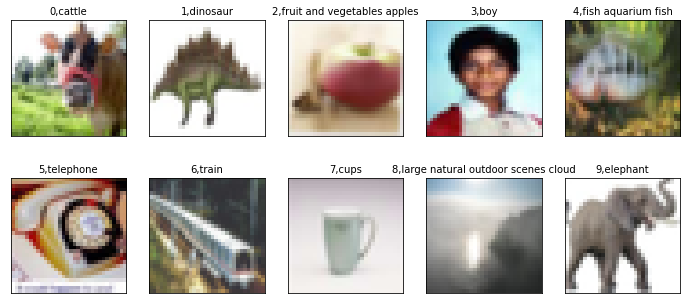

In [20]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [22]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [23]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [24]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [25]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [26]:
y_label_train.shape

(50000, 1)

In [27]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [28]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [29]:
y_label_train_OneHot.shape

(50000, 100)

In [30]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.